In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [37]:
### Part 1: Create a grid representing world map (style A) with only white/navy squares included ###

# SETUP
# block dimensions
rows_blocks = 5
cols_blocks  = 8
squares_per_block = 16
# square dimensions
rows = rows_blocks * squares_per_block # num of rows (squares unit) in world map
cols = cols_blocks * squares_per_block # num of cols (squares unit) in world map
# initialize grid
grid = np.zeros((rows, cols))

In [ ]:
class Square:
    

    def __init__(self, b, g, r):
        self.b = b
        self.g = g
        self.r = r

    

In [38]:
block_paths = glob.glob('blocks/*')
block_paths.sort() # sorts paths from (0,0), (0,1), ... -> ..., (4,6), (4,7) 

square_paths = glob.glob('squares/*')
square_paths.sort() # sorts paths from 1, 2, .. ->  9

colors = []
# reads each square and pulls the main GBR color
for sq_path in square_paths:
    print(sq_path)
    sq = cv2.imread(sq_path, cv2.IMREAD_COLOR) # reads image of square
    color = sq[14, 6] # gets GBR color of square at coordinate 14, 6
    print(color)
    colors.append(color)
    # curr_sq= cv2.cvtColor(sq, cv2.COLOR_BGR2RGB)
    # squares.append(sq)
    # squares.append(sum(sum(sum(sq)))/ (len(sq)*len(sq[0])))
    # squares.append(np.median(sq.ravel()))

    

squares/ss_1.png
[255 255 255]
squares/ss_10.png
[101  96 234]
squares/ss_2.png
[81 47  0]
squares/ss_3.png
[204 175  18]
squares/ss_4.png
[139 143   0]
squares/ss_5.png
[ 48 152   0]
squares/ss_6.png
[ 17 189 152]
squares/ss_7.png
[133 194 222]
squares/ss_8.png
[  0 162 247]
squares/ss_9.png
[  0 106 235]


In [34]:
# takes in a square
# returns index of color that best matches in the squares array; based on minimum difference in B G R values
def best_square(source):
    min_diff = np.Inf
    best_index = 0
    # sq_val = sum(sum(sum(source)))/(len(source)*len(source[0]))
    sq_color = source[14, 6]
    sq_b, sq_g, sq_r = sq_color[0], sq_color[1], sq_color[2]
    # print("square bgr:", color)
    # loops through each available color and sees if it matches
    for i in range(len(colors)):
        curr_color = colors[i]
        curr_b, curr_g, curr_r = curr_color[0], curr_color[1], curr_color[2]
        diff = abs(sq_b - curr_b) + abs(sq_g - curr_g) + abs(sq_r - curr_r)
        # print("total diff at index {i}:", diff)
        if diff < min_diff:
            min_diff = diff
            best_index = i
    # print(best_index)
    return best_index

def is_color(color, index):
    

colors: [array([255, 255, 255], dtype=uint8), array([101,  96, 234], dtype=uint8), array([81, 47,  0], dtype=uint8), array([204, 175,  18], dtype=uint8), array([139, 143,   0], dtype=uint8), array([ 48, 152,   0], dtype=uint8), array([ 17, 189, 152], dtype=uint8), array([133, 194, 222], dtype=uint8), array([  0, 162, 247], dtype=uint8), array([  0, 106, 235], dtype=uint8)]


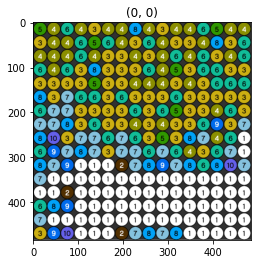

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


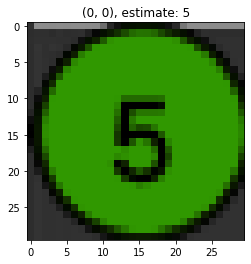

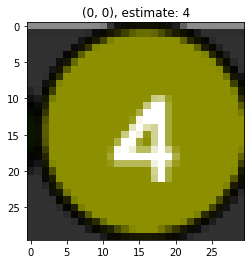

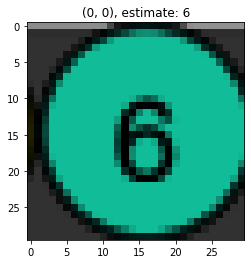

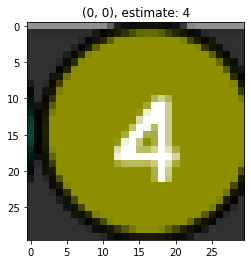

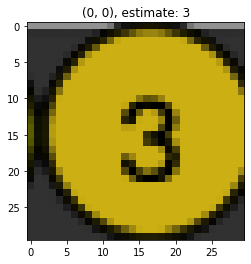

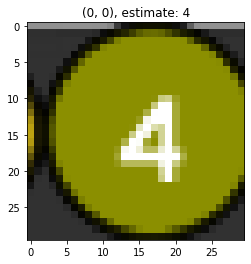

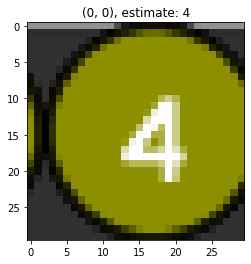

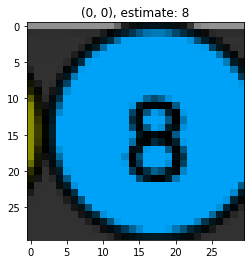

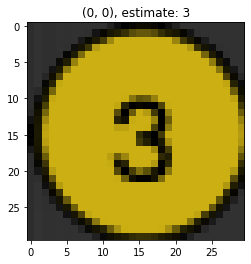

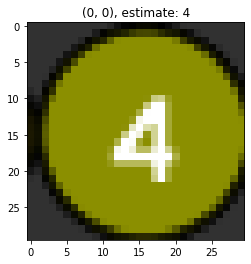

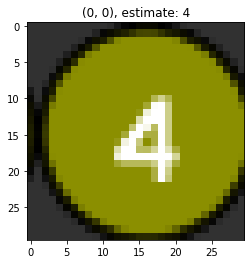

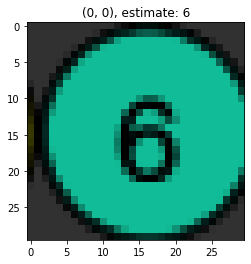

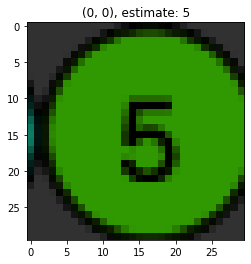

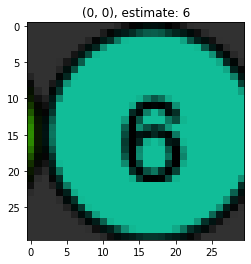

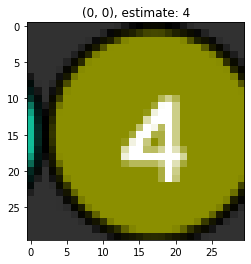

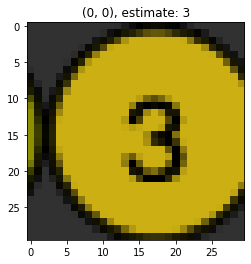

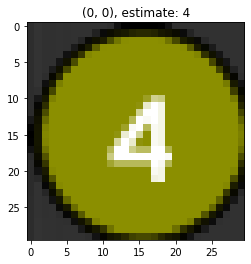

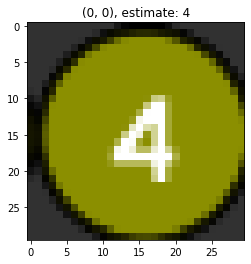

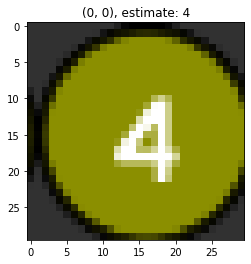

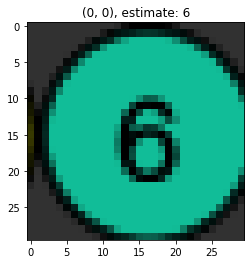

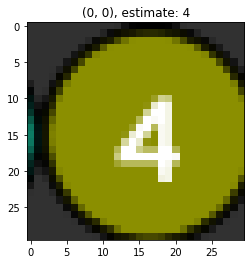

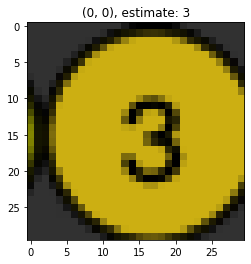

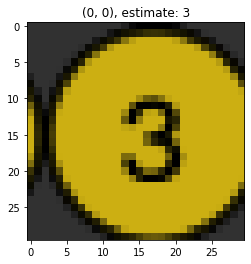

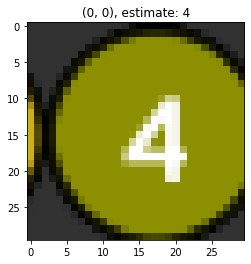

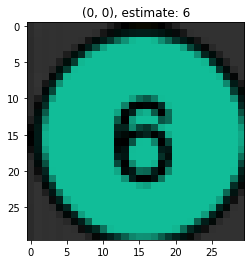

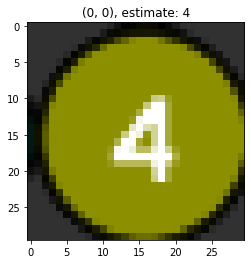

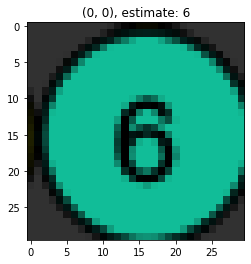

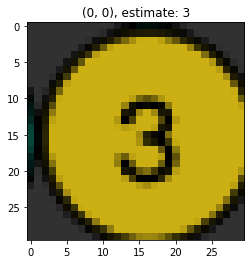

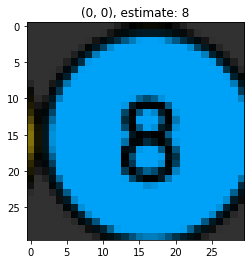

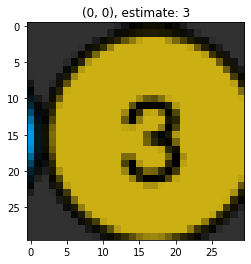

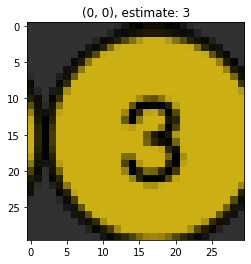

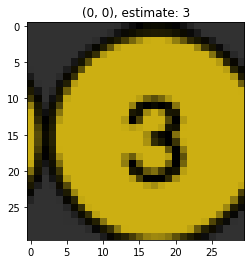

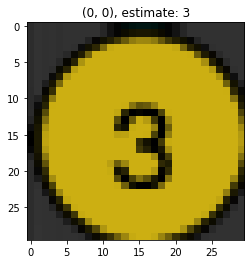

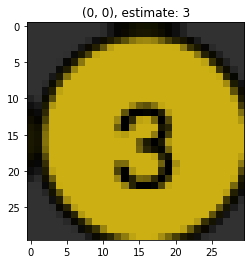

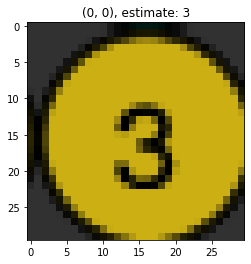

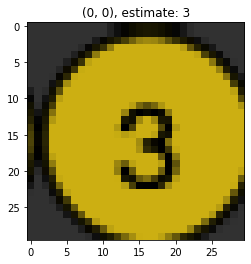

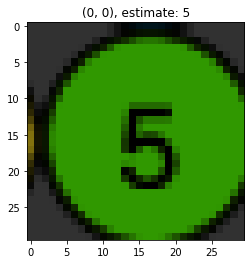

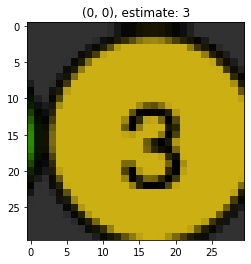

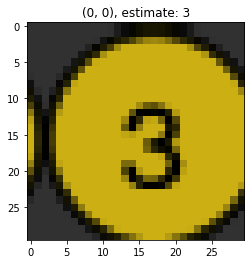

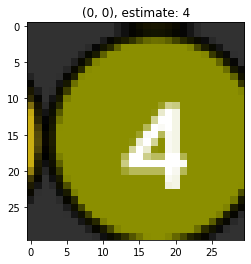

[[5. 4. 6. ... 0. 0. 0.]
 [3. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
print("colors:", colors)

### For each block path

for (i, b_path) in enumerate(block_paths):
    r_index = i // 8
    c_index = i % 8
    # gets block
    curr_block = cv2.imread(b_path, cv2.IMREAD_COLOR)
    # avg height / width per square within block
    block_height = curr_block.shape[0] // 16
    block_width = curr_block.shape[1] // 16
    # curr_block = cv2.cvtColor(curr_block, cv2.COLOR_BGR2RGB)
    plt.imshow(curr_block)
    plt.title("({}, {})".format(r_index, c_index))
    plt.show()
    for r in range(rows_blocks):
        for c in range(cols_blocks):
            # num_pixels = 30
            # curr_square = curr_block[num_pixels * r : num_pixels * (r + 1), num_pixels * c : num_pixels * (c + 1), :]
            curr_sq = curr_block[block_width * r : block_width * (r + 1), block_height * c : block_height * (c + 1), :]
            best_color = best_square(curr_sq)
            plt.imshow(curr_sq)
            plt.title("({}, {}), estimate: {}".format(r_index, c_index, best_color))
            plt.show()
            grid[r][c] = best_color
    print(grid)
    break
    

In [ ]:
### Part 2: Create ways to view the grid, block by block and the whole map ###

In [ ]:
### Part 3: Style the empty parts of the map with the remaining squares (detailed in map uilding guide) ###
